In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # for data agmuntation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

In [3]:
# Define paths for training and validation
train_dir = "plant/train"
valid_dir = "plant/valid"

# Image size and batch size
image_size = (128, 128)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [4]:
# Define test directory
test_dir = "plant/test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(128, 128))  # Resize images to (128, 128)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")


Loaded 33 test images.


In [5]:
len(train_data.class_indices)

10

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\shrey\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=2,
)

c:\Users\shrey\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
579/579 ━━━━━━━━━━━━━━━━━━━━ 413s 710ms/step - accuracy: 0.5299 - loss: 1.4378 - val_accuracy: 0.8701 - val_loss: 0.3669
Epoch 2/2
579/579 ━━━━━━━━━━━━━━━━━━━━ 201s 347ms/step - accuracy: 0.8467 - loss: 0.4554 - val_accuracy: 0.9209 - val_loss: 0.2383


In [8]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


145/145 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.9240 - loss: 0.2270
Validation Loss: 0.23834636807441711
Validation Accuracy: 0.920881986618042


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


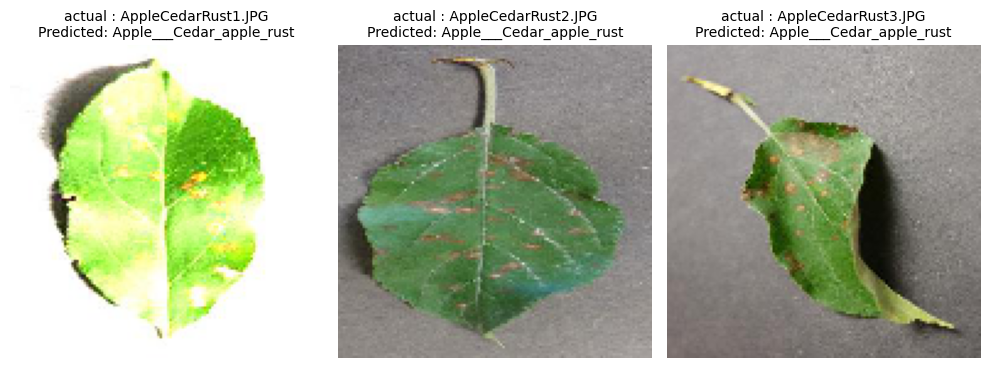

In [12]:

predictions = model.predict(test_images)

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Map indices to class labels
class_labels = list(train_data.class_indices.keys())
 
plt.figure(figsize=(10, 4))
for i in range(min(3, len(test_images))):
    plt.subplot(1, 3, i + 1)
    plt.imshow(test_images[i])
    filename = os.path.basename(test_image_paths[i])
    label = class_labels[predicted_classes[i]]
    plt.title(f"actual : {filename}\nPredicted: {label}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()
